In [32]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import IPython.display as ipd
filepath = "input/UrbanSound8K/audio/fold1/103074-7-0-0.wav"
ipd.Audio(filepath, rate=2250)

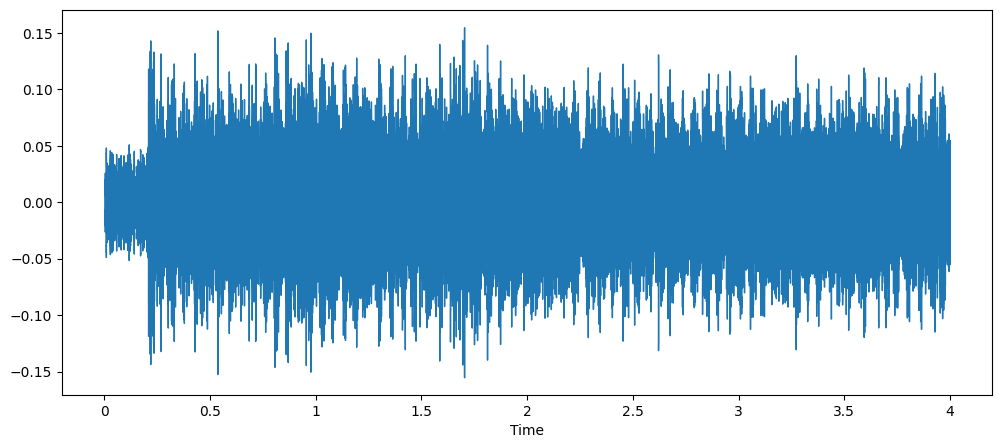

In [36]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
data, sample_rate = librosa.load(filepath)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(data, sr=sample_rate)

48000
[[ 1307136  8273920]
 [ 3883776 10120448]
 [ 7894528 12678400]
 ...
 [82106368 30823680]
 [71655168 30478336]
 [58807040 24245760]]


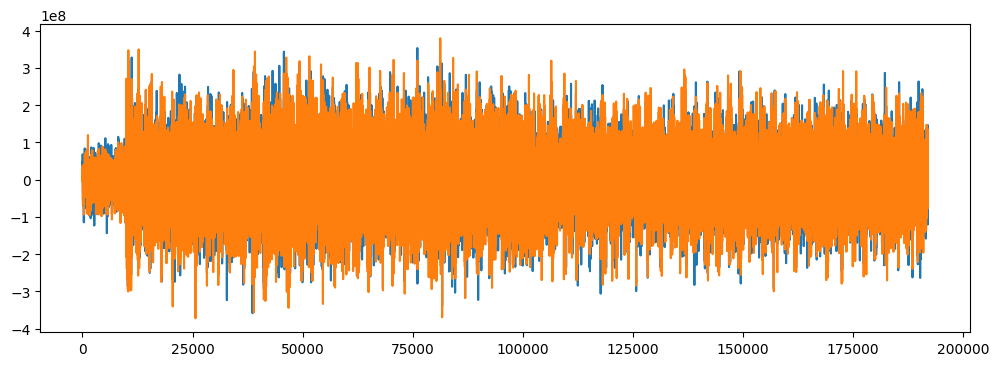

In [37]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filepath)
print(wave_sample_rate)
print(wave_audio)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [38]:
import pandas as pd
metadata = pd.read_csv('input/urbansound8k/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [39]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)
print(mfccs)

(40, 173)
[[-3.2764008e+02 -2.8665390e+02 -2.9000211e+02 ... -1.5311163e+02
  -1.5024710e+02 -1.9375616e+02]
 [ 1.5112079e+02  1.4891867e+02  1.5038649e+02 ...  8.1661575e+01
   8.0324356e+01  8.6650078e+01]
 [-1.2752694e+01 -1.1159609e+01 -1.6118874e+01 ... -2.0785460e+00
  -4.1884894e+00 -7.5812840e+00]
 ...
 [ 2.4731266e+00  2.0393348e+00 -1.9266342e+00 ...  6.8323040e+00
   6.6275740e+00  6.8086171e+00]
 [-2.8748839e+00 -4.7827277e+00 -4.4166856e+00 ... -8.7984295e+00
  -1.0455021e+01 -1.4884484e+00]
 [-2.4049296e+00  8.8420987e-02  1.8874354e+00 ...  2.5747464e+00
  -4.9162402e+00  1.7375057e+00]]


In [40]:
def features_extractor(file):
    #load the file (audio)
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    #we extract mfcc
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    #in order to find out scaled feature we do mean of transpose of value
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [43]:
#Now we ned to extract the featured from all the audio files so we use tqdm
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath('input/Urbansound8K/audio'),'fold'+str(row["fold"])+'\\',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

151it [00:07, 21.55it/s]


KeyboardInterrupt: 

In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

In [ ]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())
### Label Encoding -> Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
### No of classes
num_labels=y.shape[1]

In [ ]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 
num_epochs = 100
num_batch_size = 32
checkpointer = ModelCheckpoint(filepath='./audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)
duration = datetime.now() - start
print("Training completed in time: ", duration)

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

In [ ]:
#model.predict_classes(X_test)
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

In [ ]:
filename="../input/urbansound8k/fold7/101848-9-0-0.wav"
#preprocess the audio file
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
#Reshape MFCC feature to 2-D array
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
#predicted_label=model.predict_classes(mfccs_scaled_features)
x_predict=model.predict(mfccs_scaled_features) 
predicted_label=np.argmax(x_predict,axis=1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
print(prediction_class)